Натренувати як мінімум 2 моделі кластеризації

Підібрати оптимальну кількість кластерів використовуючи як мінімум 2 метрики

Побудувати графік втрати інформації при зменшенні розмірності.

Порівняти розбиття екземплярів на кластери при втраті 30% інформації

https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29

In [151]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn
from sklearn.preprocessing import scale
from clustergram import Clustergram
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [152]:
database = pd.read_csv("SouthGermanCredit.asc", delimiter=' ')

In [153]:
database

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [154]:
print(database.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB
No

в датасете 21 фича, некоторые категориальные, но искользование labelencodera смысла не имеет, так как категориальные фичи закодированы цифрами, а Onehotencoder только увеличит размерность. так как одной из наших задач является уменьшить размерность, потеряв только 30% информации, построим график утери данных от размерности.

In [155]:
scaler = StandardScaler()
database_rescaled = scaler.fit_transform(database)

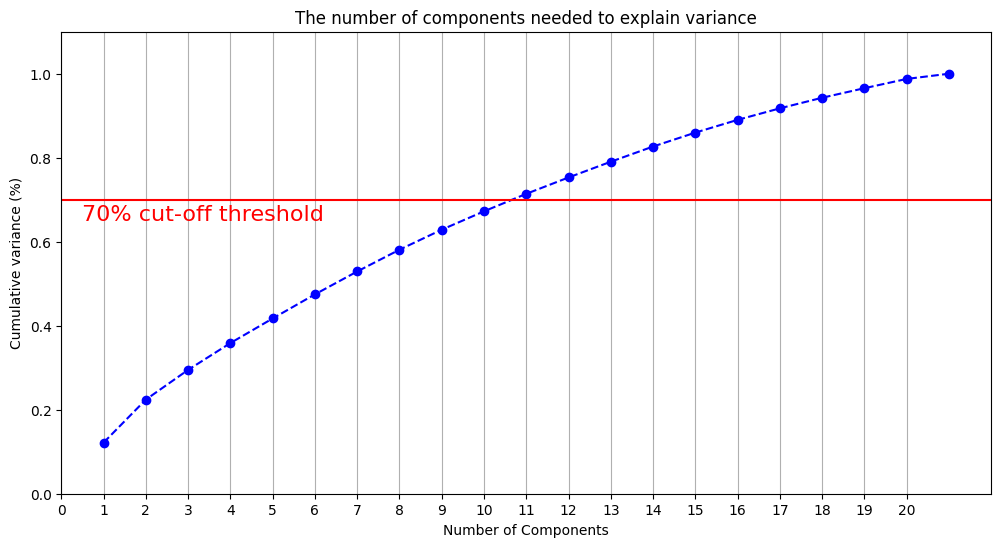

In [156]:
pca = PCA().fit(database_rescaled)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 21, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.7, color='r', linestyle='-')
plt.text(0.5, 0.65, '70% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

для сохранения 70% информации нам нужно оставить как минимум 11 фичей

In [157]:
pca = PCA(n_components=11)
data_transformed = pca.fit_transform(database_rescaled)

In [158]:
database_rescaled.shape

(1000, 21)

In [159]:
data_transformed.shape

(1000, 11)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.07280468940734863 seconds.
K=3 fitted in 0.07779192924499512 seconds.


d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4 fitted in 0.09674072265625 seconds.
K=5 fitted in 0.09674191474914551 seconds.


d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

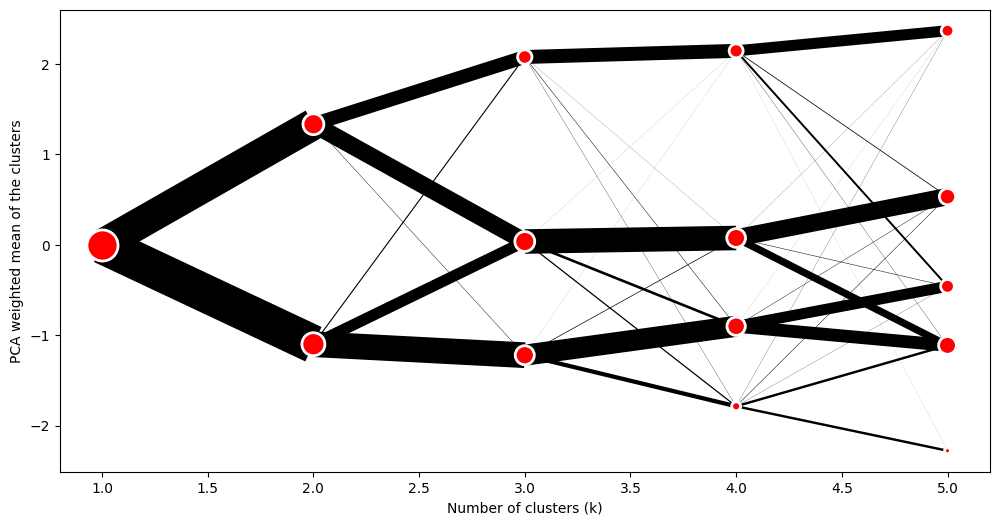

In [160]:
data = scale(database_rescaled)
cgram = Clustergram(range(1, 6))
cgram.fit(data)
cgram.plot()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.08676815032958984 seconds.
K=3 fitted in 0.08277773857116699 seconds.


d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4 fitted in 0.09574389457702637 seconds.


<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

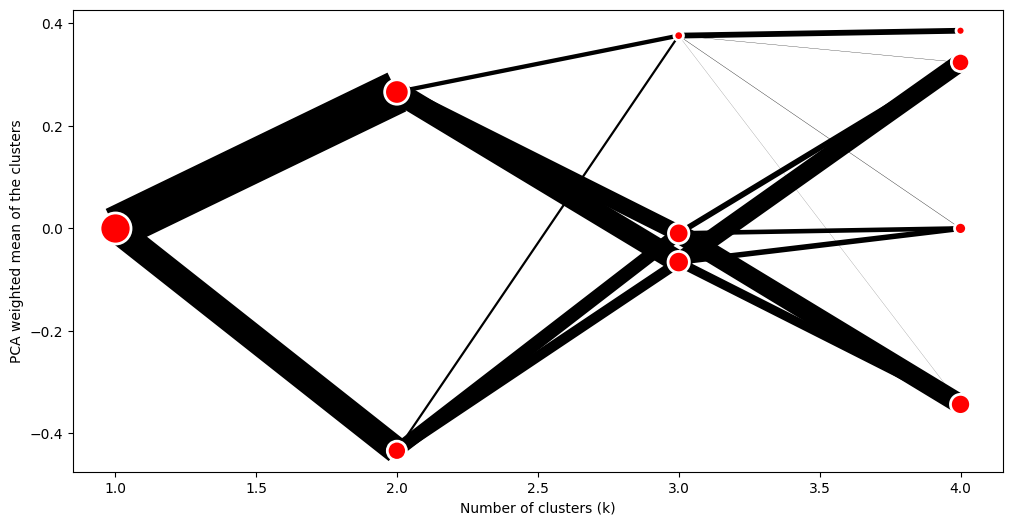

In [161]:
data = scale(data_transformed)
cgram = Clustergram(range(1, 5))
cgram.fit(data)
cgram.plot()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.08277678489685059 seconds.
K=3 fitted in 0.07679462432861328 seconds.


d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4 fitted in 0.08876514434814453 seconds.
K=5 fitted in 0.10471725463867188 seconds.


d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

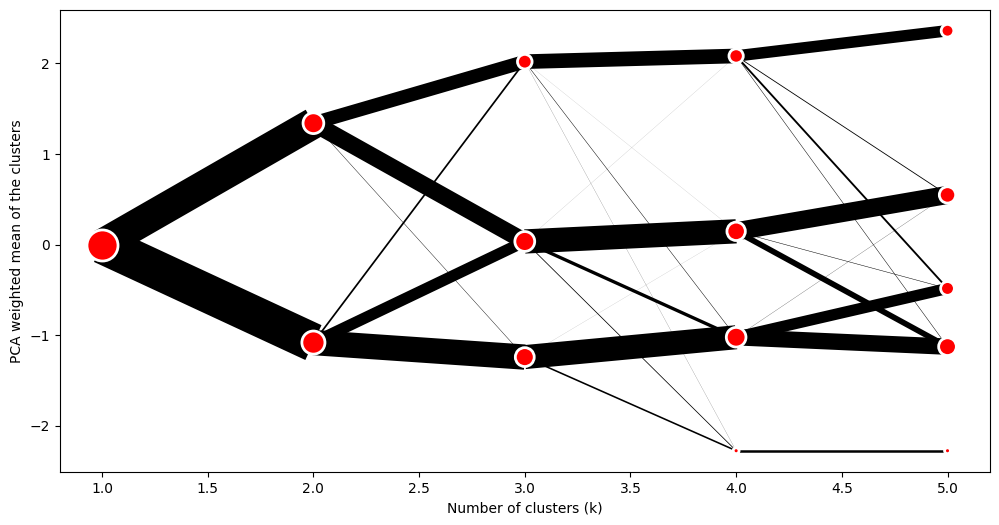

In [162]:
data = scale(database)
cgram = Clustergram(range(1, 6))
cgram.fit(data)
cgram.plot()

судя по графикам для версии без потери данных проскаллированной и нет результаты эдентичные и 2 (возможно даже 3) кластера будет оптимально. для версии после потерь данных три кластера оптимальное количество. проверим по метрикам

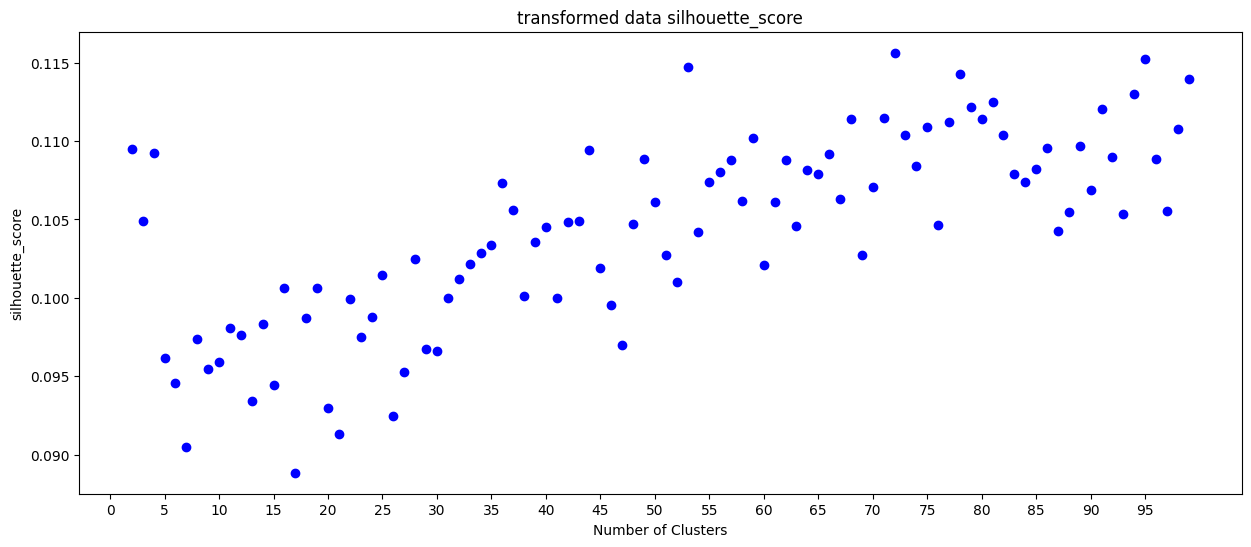

In [163]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('silhouette_score')
plt.title('transformed data silhouette_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(data_transformed)
    labels = kmeans_model.labels_
    y = metrics.silhouette_score(data_transformed, labels)
    plt.plot(i, y, marker='o', color='b')

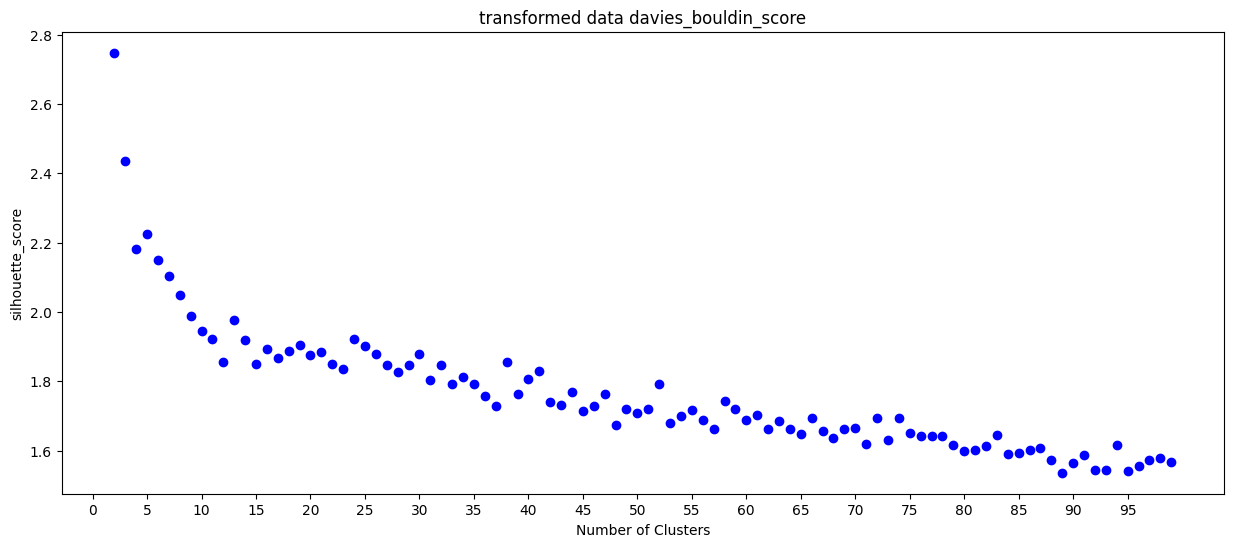

In [164]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('silhouette_score')
plt.title('transformed data davies_bouldin_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(data_transformed)
    labels = kmeans_model.labels_
    y = metrics.davies_bouldin_score(data_transformed, labels)
    plt.plot(i, y, marker='o', color='b')

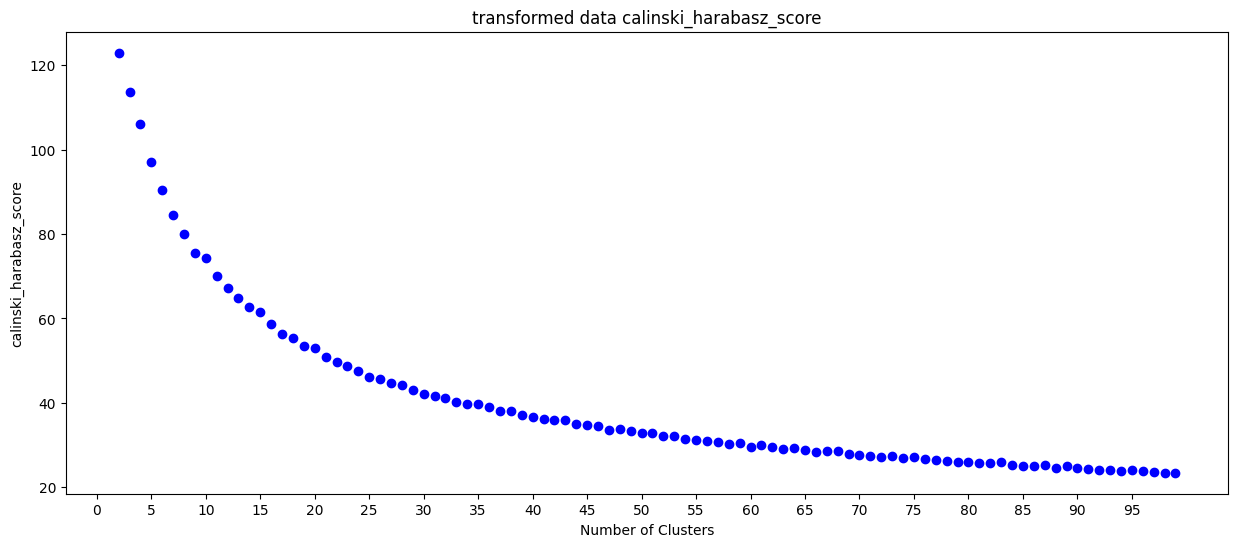

In [165]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('calinski_harabasz_score')
plt.title('transformed data calinski_harabasz_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(data_transformed)
    labels = kmeans_model.labels_
    y = metrics.calinski_harabasz_score(data_transformed, labels)
    plt.plot(i, y, marker='o', color='b')

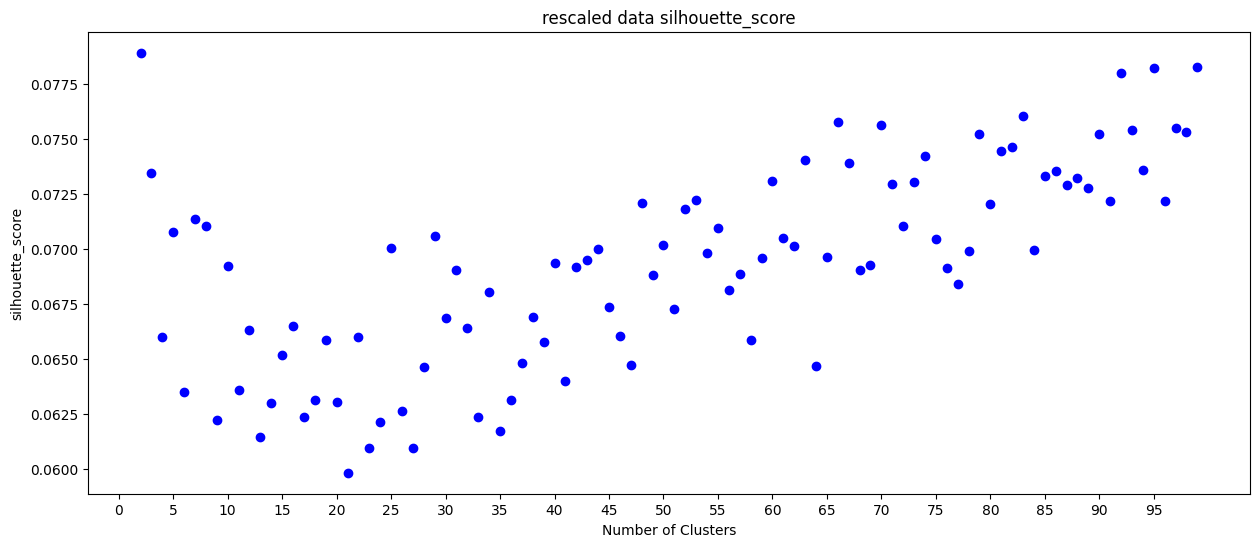

In [166]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('silhouette_score')
plt.title('rescaled data silhouette_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(database_rescaled)
    labels = kmeans_model.labels_
    y = metrics.silhouette_score(database_rescaled, labels)
    plt.plot(i, y, marker='o', color='b')

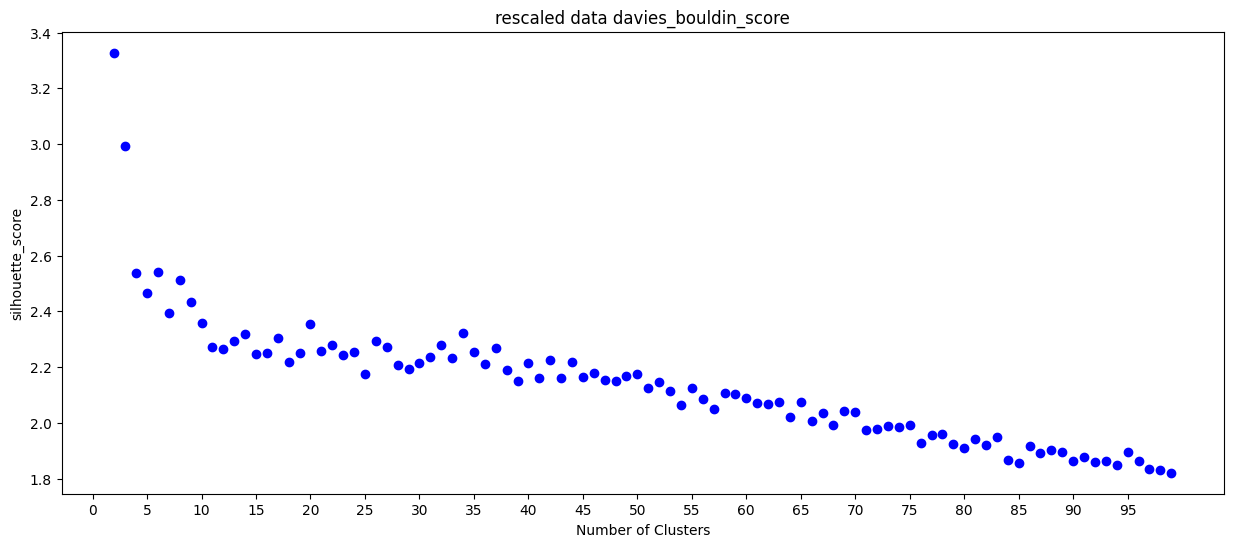

In [167]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('silhouette_score')
plt.title('rescaled data davies_bouldin_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(database_rescaled)
    labels = kmeans_model.labels_
    y = metrics.davies_bouldin_score(database_rescaled, labels)
    plt.plot(i, y, marker='o', color='b')

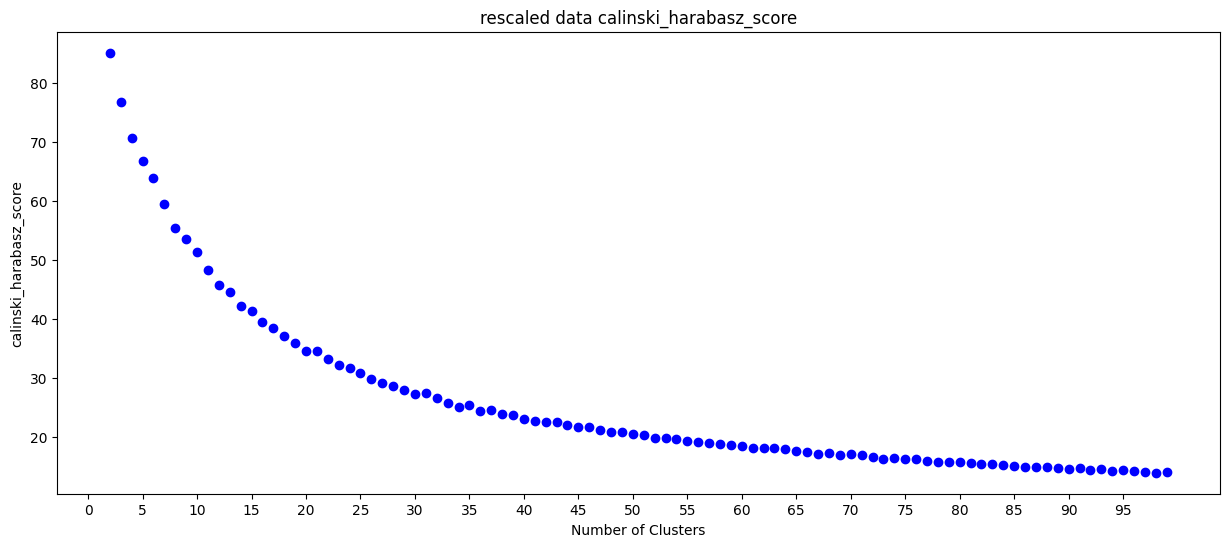

In [168]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('calinski_harabasz_score')
plt.title('rescaled data calinski_harabasz_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(database_rescaled)
    labels = kmeans_model.labels_
    y = metrics.calinski_harabasz_score(database_rescaled, labels)
    plt.plot(i, y, marker='o', color='b')

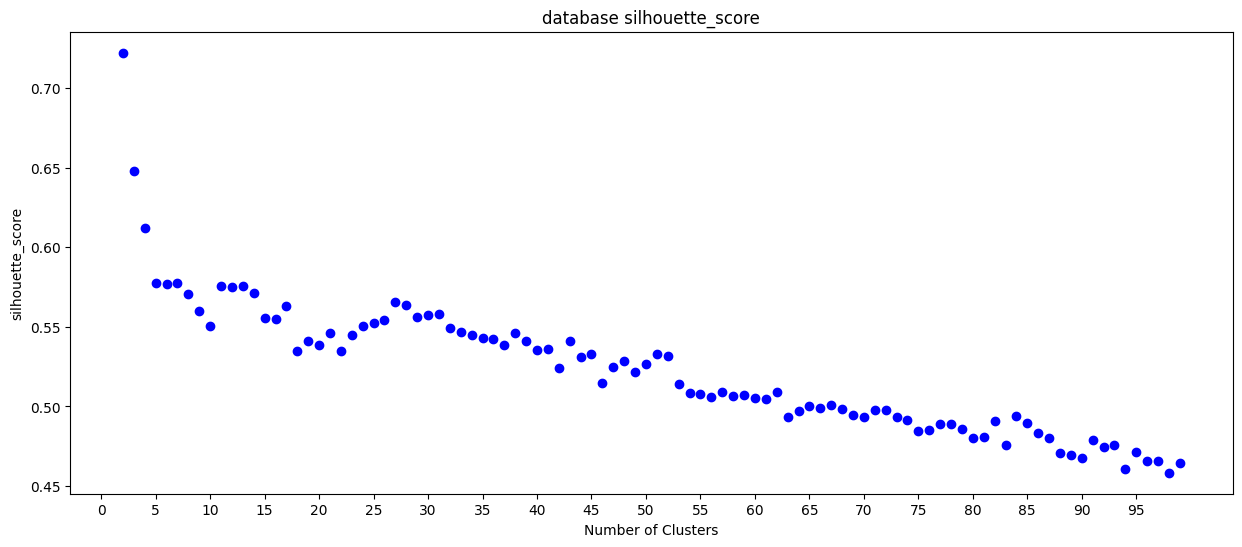

In [169]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('silhouette_score')
plt.title('database silhouette_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(database)
    labels = kmeans_model.labels_
    y = metrics.silhouette_score(database, labels)
    plt.plot(i, y, marker='o', color='b')

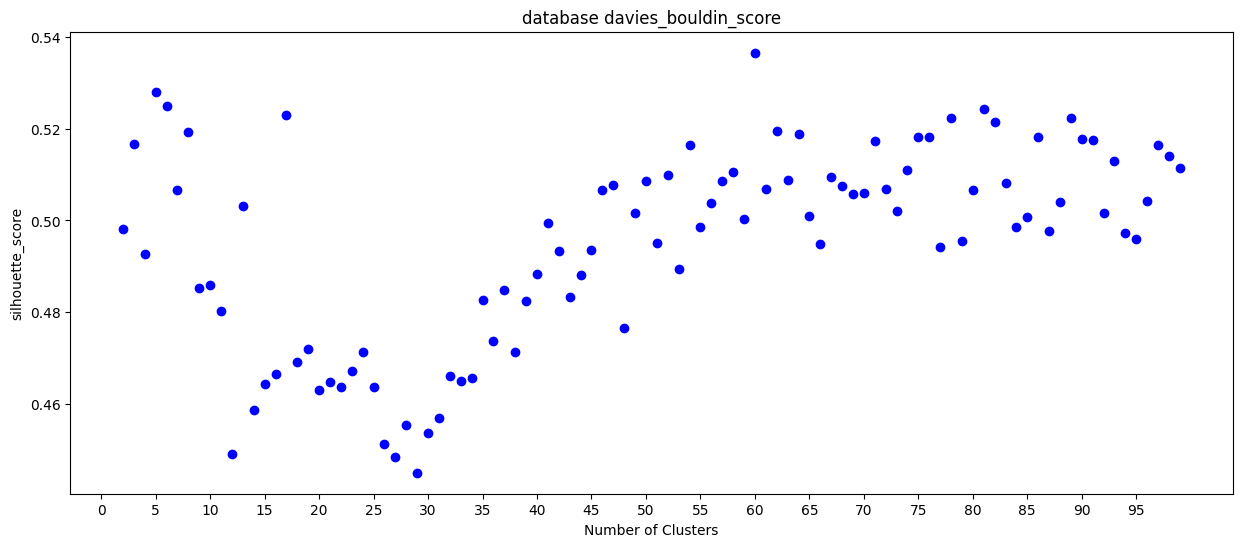

In [170]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('silhouette_score')
plt.title('database davies_bouldin_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(database)
    labels = kmeans_model.labels_
    y = metrics.davies_bouldin_score(database, labels)
    plt.plot(i, y, marker='o', color='b')

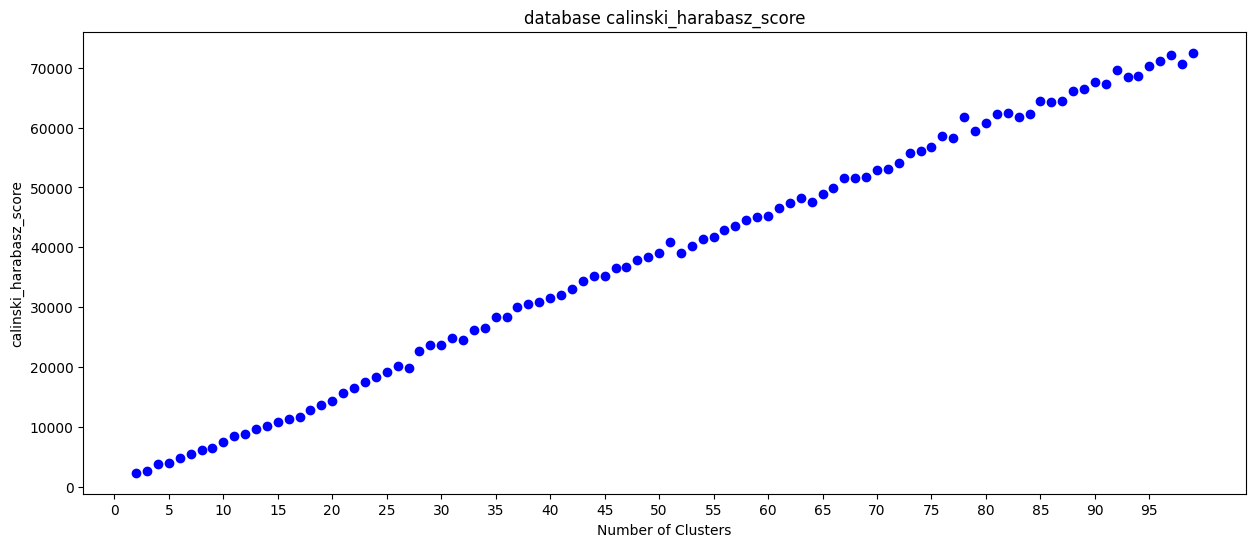

In [171]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('calinski_harabasz_score')
plt.title('database calinski_harabasz_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(database)
    labels = kmeans_model.labels_
    y = metrics.calinski_harabasz_score(database, labels)
    plt.plot(i, y, marker='o', color='b')

по графикам видно, что модели после скалирования не подойдут для кластеризации, обычная модель на calinski_harabasz_score. не дает никаких результатов, а по другим показаниям можно поделить, на 13, 17 или 27 кластеров (davies_bouldin_score дает минимум, а silhouette_score в этих точках перегиб). попробуем посмотреть что покажут результаты, если уменьшить количество фич без скалирования.

In [172]:
pca = PCA(n_components=11)
database_transformed = pca.fit_transform(database)

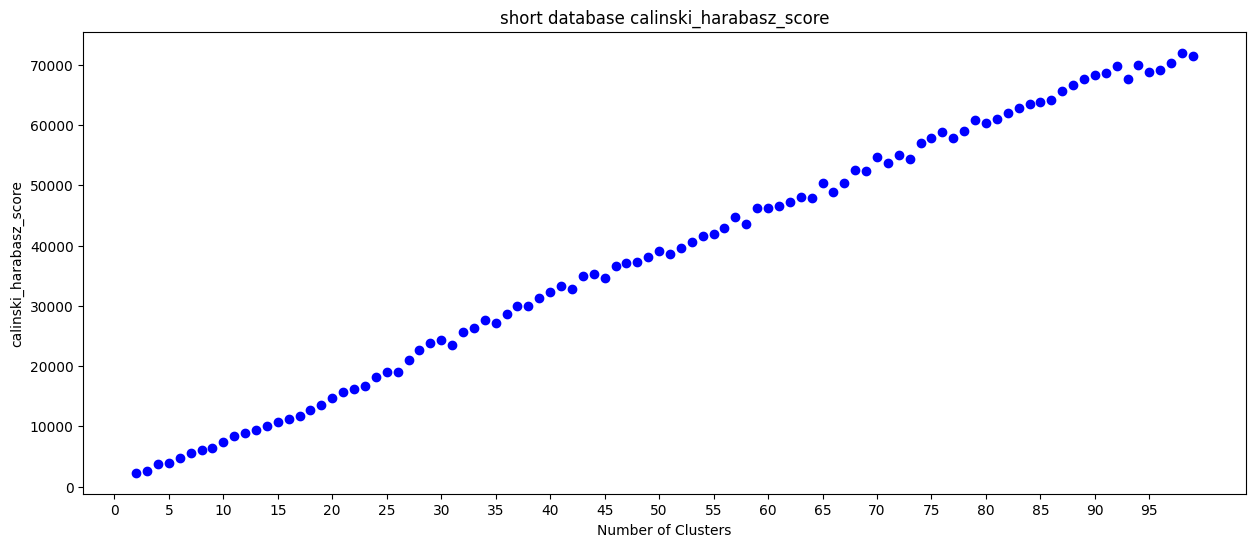

In [173]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('calinski_harabasz_score')
plt.title('short database calinski_harabasz_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(database_transformed)
    labels = kmeans_model.labels_
    y = metrics.calinski_harabasz_score(database_transformed, labels)
    plt.plot(i, y, marker='o', color='b')

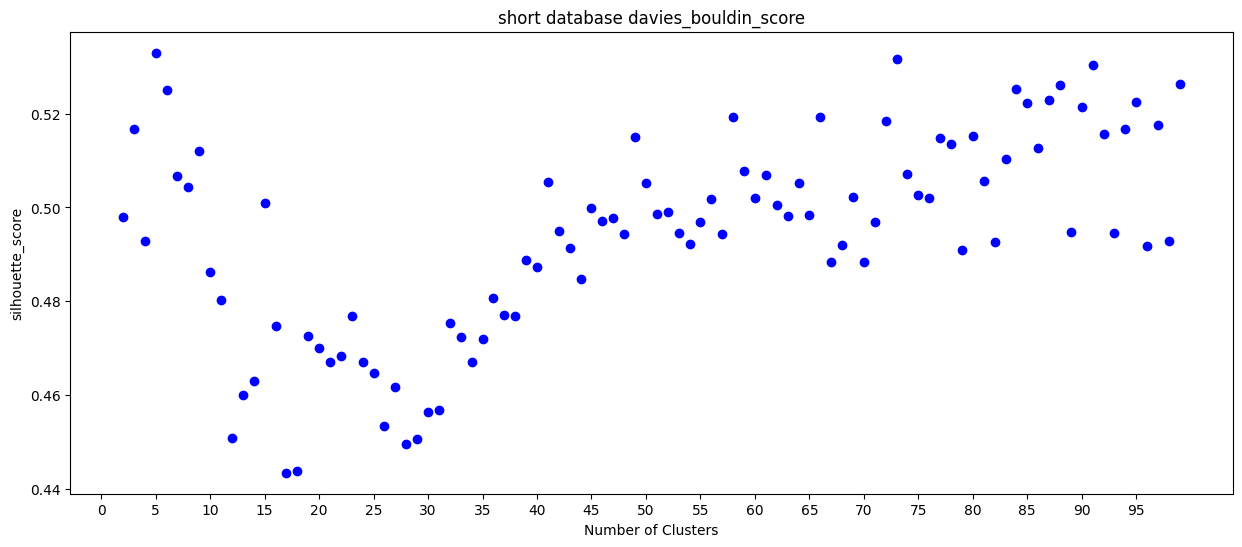

In [174]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('silhouette_score')
plt.title('short database davies_bouldin_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(database_transformed)
    labels = kmeans_model.labels_
    y = metrics.davies_bouldin_score(database_transformed, labels)
    plt.plot(i, y, marker='o', color='b')

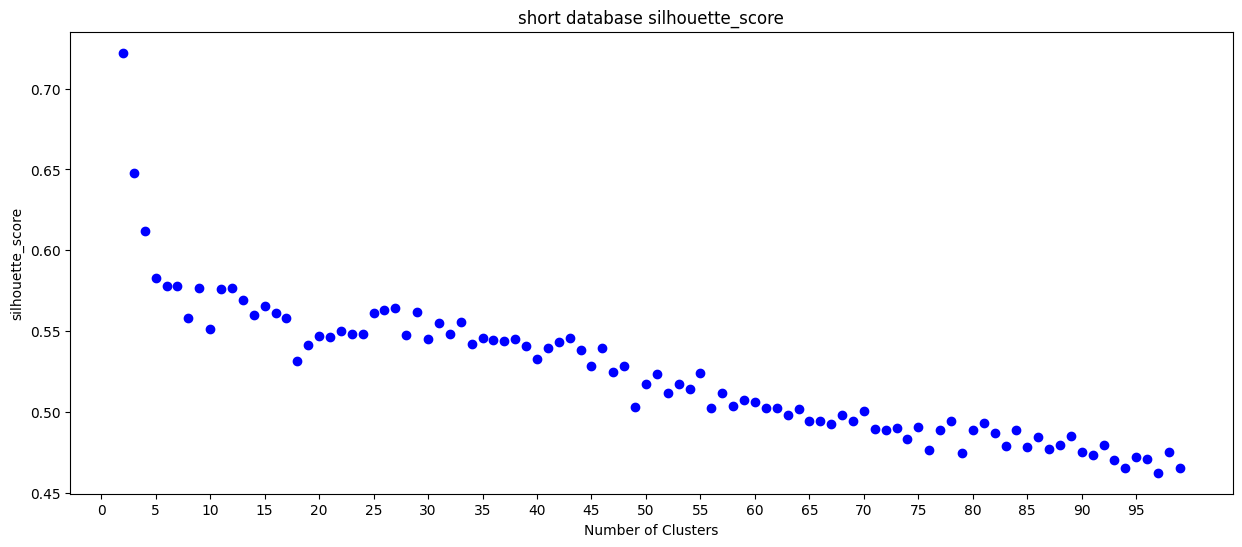

In [214]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 100, step=5))
plt.ylabel('silhouette_score')
plt.title('short database silhouette_score')
for i in range (2, 100):
    kmeans_model = KMeans(n_clusters=i,n_init=10).fit(database_transformed)
    labels = kmeans_model.labels_
    y = metrics.silhouette_score(database_transformed, labels)
    plt.plot(i, y, marker='o', color='b')

тут количество кластеров 17 и 29 более оптимальное (calinski_harabasz_score не показывает никаких результатов)

теперь поиграемся с DBscan

In [176]:
clustering = DBSCAN(eps = 100, min_samples=2).fit(database_transformed)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int64),
 array([ 18, 835, 106,   4,   5,   4,   2,   3,   5,   2,   2,   3,   3,
          2,   2,   2,   2], dtype=int64))

In [177]:
clustering = DBSCAN(eps = 100, min_samples=5).fit(database_transformed)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([ 60, 835,  94,   6,   5], dtype=int64))

In [178]:
clustering = DBSCAN(eps = 50, min_samples=4).fit(database_transformed)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18], dtype=int64),
 array([ 98, 639, 100,  24,  27,  18,   5,  17,   6,  10,  10,  11,   4,
          5,   4,   5,   4,   4,   5,   4], dtype=int64))

In [179]:
clustering = DBSCAN(eps = 100, min_samples=2).fit(database)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int64),
 array([ 18, 835, 106,   4,   5,   4,   2,   3,   5,   2,   2,   3,   3,
          2,   2,   2,   2], dtype=int64))

In [180]:
clustering = DBSCAN(eps = 100, min_samples=5).fit(database)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([ 60, 835,  94,   6,   5], dtype=int64))

In [181]:
clustering = DBSCAN(eps = 50, min_samples=4).fit(database)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18], dtype=int64),
 array([ 98, 639, 100,  24,  27,  18,   5,  17,   6,  10,  10,  11,   4,
          5,   4,   5,   4,   4,   5,   4], dtype=int64))

DBscan до уменьшения размерности и после делится практически одинаково, видно что он видит 2 явно выделинных кластера, попробуем со скаллированными вариантами

In [193]:
clustering = DBSCAN(eps = 4, min_samples=2).fit(database_rescaled)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 array([ 91, 872,  20,   3,   2,   2,   2,   2,   2,   2,   2], dtype=int64))

In [195]:
clustering = DBSCAN(eps = 5, min_samples=5).fit(database_rescaled)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 11, 956,  33], dtype=int64))

In [197]:
clustering = DBSCAN(eps = 5, min_samples=4).fit(database_rescaled)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 11, 956,  33], dtype=int64))

In [211]:
clustering = DBSCAN(eps =2, min_samples=2).fit(data_transformed)
labels = clustering.labels_
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54], dtype=int64),
 array([374, 479,   3,   2,   2,   3,   4,   2,   2,   2,   3,   2,   3,
         13,   2,   2,   2,   2,   2,   3,   2,   2,   6,   3,   6,   2,
          3,   2,   2,   2,   4,   4,   2,   2,   5,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   4,   2,   3,   2,   3,
          2,   2,   2,   2], dtype=int64))

после скалера у dbскана при разных параметрах плохо получается разделить даже на два кластера, по последнему примеру видно, что даже при условии min_samples=2 явно выделяется один кластер, а большая часть остальных точек выделяется как шум

по выводам в данном примере скалер крайне негативно влиял для разбиения на кластеры, без скалера можно довольно хорошо поделить на два кластера. потеря 30 процентов информации и уменьшение количество фичей почти в два раза для разбиения на кластеры никак не повлияло. после окончательных результатов видно, что из метрик лучше всего себя в данном примере показал silhouette_score (у него единственного для 2х кластеров лучший результат), а 2 кластера в данном примере как по мне оптимальное деление и Clustergram по которой тоже видно что при трех и больше кластерах начинается путаница и перемещение данных между кластерами